# Reading dataset

`

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('stroke-balanced.csv')
data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44912,Male,12.0,0,0,No,children,Urban,67.06,16.1,Unknown,0
1,66972,Female,52.0,0,0,Yes,Govt_job,Urban,80.88,23.8,smokes,0
2,1451,Female,17.0,0,0,No,Private,Urban,78.46,23.5,Unknown,0
3,49797,Female,28.0,0,0,No,Private,Rural,75.53,34.9,never smoked,0
4,70241,Female,22.0,0,0,No,Private,Urban,66.29,20.5,smokes,0
5,28651,Male,66.0,0,0,Yes,Private,Urban,247.48,33.5,smokes,0
6,28513,Female,73.0,0,0,Yes,Private,Rural,88.98,20.6,smokes,0
7,8690,Female,81.0,0,0,Yes,Private,Urban,80.44,32.2,never smoked,0
8,55220,Male,53.0,0,0,Yes,Private,Urban,76.03,27.3,never smoked,0
9,47159,Male,68.0,0,0,Yes,Private,Urban,155.17,35.5,never smoked,0


# Handling missing values

In [2]:
mask = data.isnull().any(axis=1) 
print(mask)

0      False
1      False
2      False
3      False
4      False
       ...  
991     True
992    False
993    False
994     True
995    False
Length: 996, dtype: bool


In [3]:
data_clean = data[~mask] # remove rows with missing data

# Input and output

In [4]:
data_input = data_clean.drop(columns=['id', 'stroke'])  # Select all columns from `data_clean` except `id` and `stroke`
data_output = data_clean['stroke'] # Select `stroke` column from `data_clean`

# Handling categorical data
## Numeric encoding

In [5]:
# print data types of `data_input`
data_input.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [6]:
# print unique values of categorical features
print(data_input['gender'].unique())
print(data_input['ever_married'].unique())
print(data_input['work_type'].unique()) 
print(data_input['Residence_type'].unique())
print(data_input['smoking_status'].unique())

['Male' 'Female']
['No' 'Yes']
['children' 'Govt_job' 'Private' 'Self-employed' 'Never_worked']
['Urban' 'Rural']
['Unknown' 'smokes' 'never smoked' 'formerly smoked']


In [7]:
data_input_encoded_1 = data_input.replace({
    # use numeric encoding to encode `gender`, `ever_married`, and `Residence_type`
    'gender':{'Male':0, 'Female':1},
    'ever_married':{'No':0, 'Yes':1},
    'Residence_type':{'Urban':0, 'Rural':1}
})

In [8]:
data_input_encoded_1.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

## One-hot encoding

In [9]:
data_input_encoded_2 = pd.get_dummies(data_input_encoded_1)  # apply one-hot encoding to data_input_encoded_1

In [10]:
data_input_encoded_2.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,12.0,0,0,0,0,67.06,16.1,0,0,0,0,1,1,0,0,0
1,1,52.0,0,0,1,0,80.88,23.8,1,0,0,0,0,0,0,0,1
2,1,17.0,0,0,0,0,78.46,23.5,0,0,1,0,0,1,0,0,0
3,1,28.0,0,0,0,1,75.53,34.9,0,0,1,0,0,0,0,1,0
4,1,22.0,0,0,0,0,66.29,20.5,0,0,1,0,0,0,0,0,1


# Split into (train - validation - test)

In [11]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split( data_input_encoded_2, data_output, test_size=0.20, random_state = 1 )

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.25, random_state = 1 )

In [12]:
print(X_train.shape)
print(y_train.shape)
print('---------------------')
print(X_val.shape)
print(y_val.shape)
print('---------------------')
print(X_test.shape)
print(y_test.shape)

(544, 17)
(544,)
---------------------
(182, 17)
(182,)
---------------------
(182, 17)
(182,)


<AxesSubplot:xlabel='age', ylabel='bmi'>

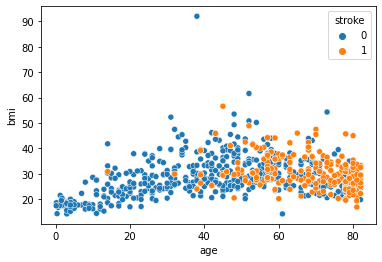

In [13]:
sns.scatterplot(x=data.age , y=data.bmi , hue = data.stroke )

[(0, 291), (1, 253)]


C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

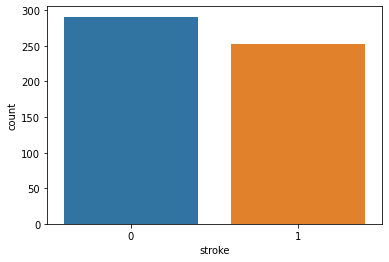

In [14]:
from collections import Counter
print(sorted(Counter(y_train).items()))
sns.countplot(y_train)

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

[(0, 291), (1, 291)]


C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

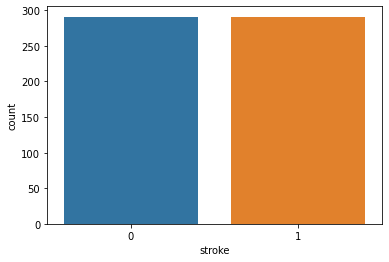

In [16]:
from collections import Counter
print(sorted(Counter(y_train).items()))
sns.countplot(y_train)

In [17]:
print(X_train.shape)
print(y_train.shape)
print('---------------------')

(582, 17)
(582,)
---------------------


# Feature scaling (Normalization)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_val_scaled = sc.fit_transform(X_val)

# naive_bayes
## Training and Validation

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [20]:
classifier = BernoulliNB()
classifier.fit(X_train_scaled, y_train)

BernoulliNB()

In [21]:
y_pred_train = classifier.predict(X_train_scaled)
y_pred_val = classifier.predict(X_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.738831615120275
0.6923076923076923


## Testing

In [26]:
y_pred_test = classifier.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.7307692307692307


#  Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred_train = logistic_clf.predict(X_train_scaled)
y_pred_val = logistic_clf.predict(X_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.7869415807560137
0.7802197802197802


## Testing

In [24]:
y_pred_test = logistic_clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.7417582417582418
